# Carga de BoW

In [27]:
# Importo paquetes

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import sparse

In [112]:
X_train = sparse.load_npz("./Data/X_train_BoW.npz")
X_test = sparse.load_npz("./Data/X_test_BoW.npz")
y_train = pd.read_csv("./Data/y_train.csv", header=None)
y_test = pd.read_csv("./Data/y_test.csv", header=None)

In [113]:
X_train.shape

(1424931, 34378)

In [114]:
y_train.shape

(1424931, 1)

In [115]:
y_train = y_train[0]
y_test = y_test[0]

In [116]:
y_train.shape

(1424931,)

In [117]:
X_test.shape

(621373, 34378)

In [118]:
y_test.shape

(621373,)

# Modelado Multinomial Naive Bayes

In [119]:
from sklearn.naive_bayes import MultinomialNB
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [127]:
# Con los features de test transformados calculamos las labels predichas
labels_predichas = modelo_NB.predict(X_train)

In [128]:
# Primero calculamos el accuracy general del modelo
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_curve, roc_auc_score, auc
roc_auc_score(y_train, labels_predichas)

0.6335184283919462

In [129]:
# Con los features de test transformados calculamos las labels predichas
labels_predichas = modelo_NB.predict(X_test)

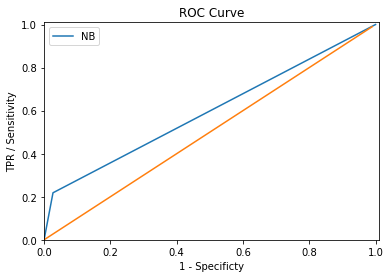

In [130]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score

fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, labels_predichas)

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB'])
plt.show() 

In [124]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))

AUC-NB= 0.5957443646749849
